**Data cleaning&Classification algorithms comparison**

**In this study, chronic kidney disease was estimated using classification algorithms. You'll find this kernel;**
            * The codes I think will be useful for data cleaning
            * How to Handle Missing Data,what did I do?
            * Data Visualization
            *  Classification Algorithms
                -KNN
                -Navie-Bayes
                -Logistic Regression
                -Decision Tree
                -Random Forest
                -Support Vector Machine          
            * Success rate of classification algorithms
            * Conclusion



In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns #for confusion matrix
#For data visualization
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import warnings 
#warnings.filterwarnings('ignore')

import os
#print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [2]:
data=pd.read_csv("kidney_disease.csv")

In [3]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
data.info() #data types and feature names. 
            #I'll change the data types of some parameters in the following codes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
id                400 non-null int64
age               391 non-null float64
bp                388 non-null float64
sg                353 non-null float64
al                354 non-null float64
su                351 non-null float64
rbc               248 non-null object
pc                335 non-null object
pcc               396 non-null object
ba                396 non-null object
bgr               356 non-null float64
bu                381 non-null float64
sc                383 non-null float64
sod               313 non-null float64
pot               312 non-null float64
hemo              348 non-null float64
pcv               330 non-null object
wc                295 non-null object
rc                270 non-null object
htn               398 non-null object
dm                398 non-null object
cad               398 non-null object
appet             399 non-null object
pe         

In [5]:
data.head() #first 5 samples in dataset

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [6]:
data.classification.unique() 

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

**PREPARE DATA**

**1) 3 unique values appear in the data set. However, there is no value called  "ckd\t. "  I have written the following code to solve this problem.**

In [7]:
data.classification=data.classification.replace("ckd\t","ckd") 

In [8]:
data.classification.unique() #problem solved.

array(['ckd', 'notckd'], dtype=object)

**2) The "id" parameter will not work for classification, so I'm removing this parameter from the data set.**

In [9]:
data.drop("id",axis=1,inplace=True) 

In [10]:
data.head() #id parameter dropped.

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


**3) I changed the target parameter values to 1 and 0 to be able to use the classification algorithms. If the value is "ckd" is 1, if not equal to 0. **

In [11]:
data.classification=[1 if each=="ckd" else 0 for each in data.classification]

In [12]:
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,1
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,1
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,1
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,1
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,1


**4) I used the following code to find out how many "NaN" values in which parameter.**

In [13]:
data.isnull().sum() 

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64


**5)Sometimes instead of Nan in the data set, "?" value can be found. To solve this problem ; **df = data [(data! = '?'). all (axis = 1)]** can be used.**


                       **How to Handle Missing Data,what did I do?**

Pandas provides the dropna() function that can be used to drop either columns or rows with missing data. We can use dropna() to remove all rows with missing data
Removing rows with missing values can be too limiting on some predictive modeling problems, an alternative is to impute missing values.
Imputing refers to using a model to replace missing values.

There are many options we could consider when replacing a missing value, for example:

    A constant value that has meaning within the domain, such as 0, distinct from all other values.
    A value from another randomly selected record.
    A mean, median or mode value for the column.
    A value estimated by another predictive model.    

Pandas provides the fillna() function for replacing missing values with a specific value.

For example, we can use fillna() to replace missing values with the mean value for each column,
For example; dataset.fillna(dataset.mean(), inplace=True)

**6) I can use dropna() to remove all rows with missing data**
  
There were 25 parameters of 400 samples before writing this code. After writing this code, there are 25 parameters left in 158 examples.

The number of samples decreased but the reliability of the model increased.

In [14]:

df=data.dropna(axis=0)
print(data.shape)
print(df.shape) 
df.head()

(400, 25)
(158, 25)


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,1
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29,12100,3.7,yes,yes,no,poor,no,yes,1
11,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,380.0,...,32,4500,3.8,yes,yes,no,poor,yes,no,1
14,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,157.0,...,16,11000,2.6,yes,yes,yes,poor,yes,no,1
20,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,173.0,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,1


**7) indexes are not sequential as you can see in the table above. I used the following code to sort indexes.**

In [15]:
df.index=range(0,len(df),1)
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,1
1,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29,12100,3.7,yes,yes,no,poor,no,yes,1
2,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,380.0,...,32,4500,3.8,yes,yes,no,poor,yes,no,1
3,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,157.0,...,16,11000,2.6,yes,yes,yes,poor,yes,no,1
4,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,173.0,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,1


**8) I corrected some of the parameters.**

In [16]:
#you can see that the values have changed.
df.wc=df.wc.replace("\t6200",6200)
df.wc=df.wc.replace("\t8400",8400) 
print(df.loc[11,["wc"]])
print(df.loc[20,["wc"]])

wc    6200
Name: 11, dtype: object
wc    8400
Name: 20, dtype: object


C:\Users\kratika\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**9) I'll change the data types of some parameters **

In [17]:
df.pcv=df.pcv.astype(int)
df.wc=df.wc.astype(int)
df.rc=df.rc.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 25 columns):
age               158 non-null float64
bp                158 non-null float64
sg                158 non-null float64
al                158 non-null float64
su                158 non-null float64
rbc               158 non-null object
pc                158 non-null object
pcc               158 non-null object
ba                158 non-null object
bgr               158 non-null float64
bu                158 non-null float64
sc                158 non-null float64
sod               158 non-null float64
pot               158 non-null float64
hemo              158 non-null float64
pcv               158 non-null int32
wc                158 non-null int32
rc                158 non-null float64
htn               158 non-null object
dm                158 non-null object
cad               158 non-null object
appet             158 non-null object
pe                158 non-null object
ane        

**10)Keep in mind, the goal in this section is to have all the columns as numeric columns (int or float data type), and containing no missing values. We just dealt with the missing values, so let's now find out the number of columns that are of the object data type and then move on to process them into numeric form.**

In [18]:
dtype_object=df.select_dtypes(include=['object'])
dtype_object.head()

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane
0,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes
1,abnormal,abnormal,present,notpresent,yes,yes,no,poor,no,yes
2,abnormal,abnormal,present,notpresent,yes,yes,no,poor,yes,no
3,normal,abnormal,present,present,yes,yes,yes,poor,yes,no
4,abnormal,abnormal,notpresent,notpresent,yes,yes,yes,poor,yes,yes


**11)display a sample row to get a better sense of how the values in each column are formatted.**

In [19]:
for x in dtype_object.columns:
    print("{} unique values:".format(x),df[x].unique())
    print("*"*20)

rbc unique values: ['normal' 'abnormal']
********************
pc unique values: ['abnormal' 'normal']
********************
pcc unique values: ['present' 'notpresent']
********************
ba unique values: ['notpresent' 'present']
********************
htn unique values: ['yes' 'no']
********************
dm unique values: ['no' 'yes']
********************
cad unique values: ['no' 'yes']
********************
appet unique values: ['poor' 'good']
********************
pe unique values: ['yes' 'no']
********************
ane unique values: ['yes' 'no']
********************


**12)The ordinal values to integers, we can use the pandas DataFrame method replace() to"rbc","pc","pcc","ba","htn","dm","cad","appet","pe" and "ane" to appropriate numeric values**

In [20]:
dictonary = {
        "rbc": {
        "abnormal":1,
        "normal": 0,
    },
        "pc":{
        "abnormal":1,
        "normal": 0,
    },
        "pcc":{
        "present":1,
        "notpresent":0,
    },
        "ba":{
        "notpresent":0,
        "present": 1,
    },
        "htn":{
        "yes":1,
        "no": 0,
    },
        "dm":{
        "yes":1,
        "no":0,
    },
        "cad":{
        "yes":1,
        "no": 0,
    },
        "appet":{
        "good":1,
        "poor": 0,
    },
        "pe":{
        "yes":1,
        "no":0,
    },
        "ane":{
        "yes":1,
        "no":0,
    }
}



In [21]:
#We used categorical values as numerical to replace them.
df=df.replace(dictonary)


In [22]:
df.head() #All values are numerical.

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,70.0,1.005,4.0,0.0,0,1,1,0,117.0,...,32,6700,3.9,1,0,0,0,1,1,1
1,53.0,90.0,1.020,2.0,0.0,1,1,1,0,70.0,...,29,12100,3.7,1,1,0,0,0,1,1
2,63.0,70.0,1.010,3.0,0.0,1,1,1,0,380.0,...,32,4500,3.8,1,1,0,0,1,0,1
3,68.0,80.0,1.010,3.0,2.0,0,1,1,1,157.0,...,16,11000,2.6,1,1,1,0,1,0,1
4,61.0,80.0,1.015,2.0,0.0,1,1,0,0,173.0,...,24,9200,3.2,1,1,1,0,1,1,1


**VISUALIZATION**

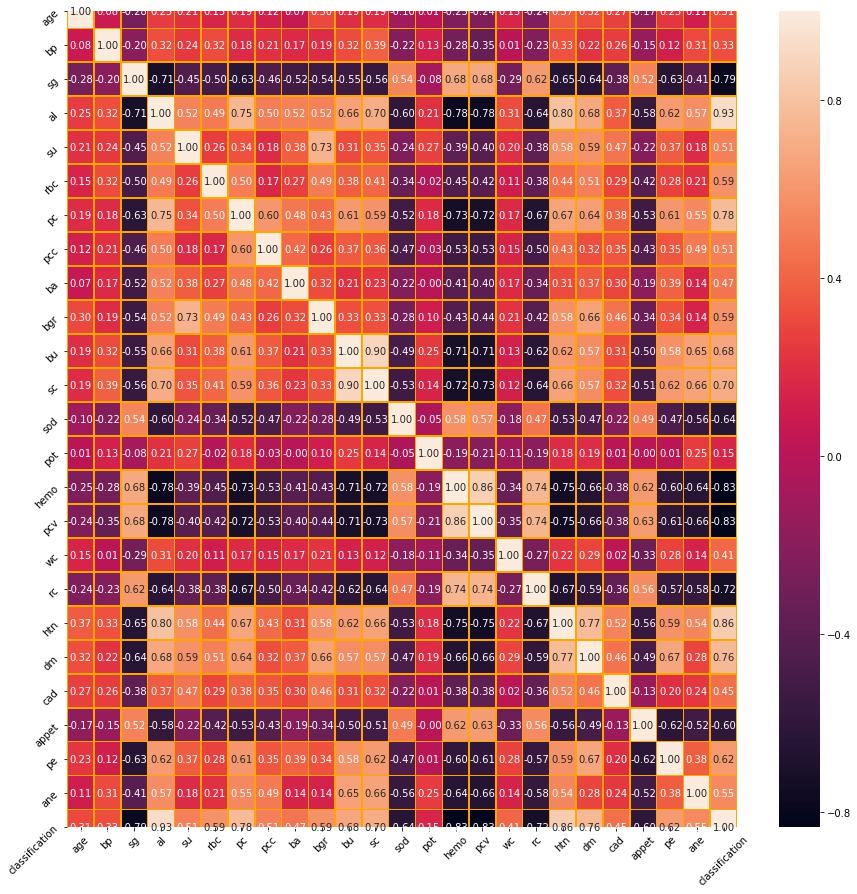

In [23]:
#HEAT MAP #correlation of parameters 
f,ax=plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


In [24]:
#box-plot
trace0 = go.Box(
    y=df.bp,
    name = 'Bp',
    marker = dict(
        color = 'rgb(12, 12, 140)',
    )
)
trace1 = go.Box(
    y=df.sod,
    name = 'Sod',
    marker = dict(
        color = 'rgb(12, 128, 128)',
    )
)
data = [trace0, trace1]
iplot(data)

In [25]:
#Line plot
df2=df.copy()
df2["id"]=range(1,(len(df.ba)+1),1)
df2["df2_bp_norm"]=(df2.bp-np.min(df2.bp))/(np.max(df2.bp)-np.min(df2.bp))
df2["df2_hemo_norm"]=(df2.hemo-np.min(df2.hemo))/(np.max(df2.hemo)-np.min(df2.hemo))
#Line Plot
trace1 = go.Scatter(
        x = df2.id,
        y = df2.df2_bp_norm,
        mode = "lines",
        name = "Blood Press.",
        marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
        text= df.age)
trace2 = go.Scatter(
        x = df2.id,
        y = df2.df2_hemo_norm,
        mode = "lines+markers",
        name = "Hemo",
        marker = dict(color = 'rgba(80, 26, 80, 0.8)'),
        text= df.age)
data=[trace1,trace2]
layout=dict(title="Blood Press and Hemoglobin values according the age",
            xaxis=dict(title="İd",ticklen=5,zeroline=False))
fig=dict(data=data,layout=layout)
iplot(fig)

**CLASSIFICATION ALGORITHMS**

In [25]:
score=[] #these variables will be used to show the algorithm name and its successes.
algorithms=[] 

KNN accuracy = 95.83333333333334
[[35  0]
 [ 2 11]]


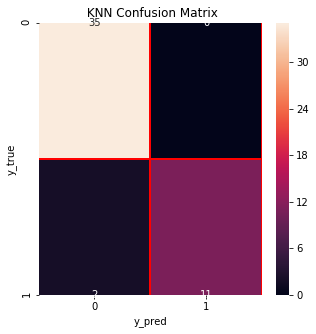

In [26]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
y=df["classification"].values
x_data=df.drop(["classification"],axis=1)

#Normalization
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

#Preparing the test and training set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.3)

#model and accuracy
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
knn.predict(x_test)
score.append(knn.score(x_test,y_test)*100)
algorithms.append("KNN")
print("KNN accuracy =",knn.score(x_test,y_test)*100)

#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred=knn.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)
print(cm)
#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title(" KNN Confusion Matrix")
plt.show()
#%%


Random Forest accuracy = 1.0
[[35  0]
 [ 0 13]]


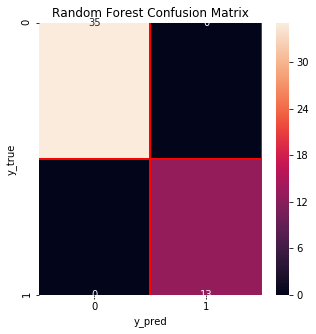

In [27]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=1)
rf.fit(x_train,y_train)
score.append(rf.score(x_test,y_test)*100)
algorithms.append("Random Forest")
print("Random Forest accuracy =",rf.score(x_test,y_test))

#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred=rf.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)
print(cm)
#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Random Forest Confusion Matrix")
plt.show()

Navie Bayes accuracy = 100.0
[[35  0]
 [ 0 13]]


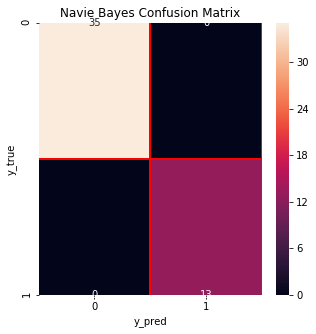

In [32]:
#Navie-Bayes
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()

#Training
nb.fit(x_train,y_train)
#Test
score.append(nb.score(x_test,y_test)*100)
algorithms.append("Navie-Bayes")
print("Navie Bayes accuracy =",nb.score(x_test,y_test)*100)

#Confusion Matrix 
from sklearn.metrics import confusion_matrix
y_pred=nb.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)
print(cm)
#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Navie Bayes Confusion Matrix")
plt.show()

C:\Users\kratika\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



svm test accuracy = 95.83333333333334
[[35  0]
 [ 2 11]]


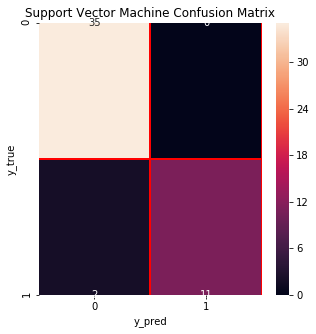

In [28]:
#Support Vector Machine
from sklearn.svm import SVC
svm=SVC(random_state=1)
svm.fit(x_train,y_train)
score.append(svm.score(x_test,y_test)*100)
algorithms.append("Support Vector Machine")
print("svm test accuracy =",svm.score(x_test,y_test)*100)

#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred=svm.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)
print(cm)
#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Support Vector Machine Confusion Matrix")
plt.show()

Decision Tree accuracy: 97.91666666666666
[[35  0]
 [ 1 12]]


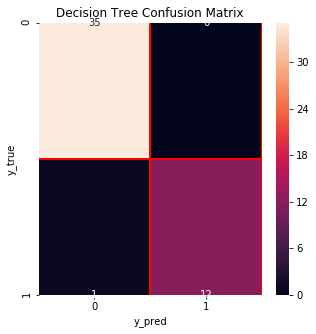

In [29]:
#Decision Tree 
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
print("Decision Tree accuracy:",dt.score(x_test,y_test)*100)
score.append(dt.score(x_test,y_test)*100)
algorithms.append("Decision Tree")

#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred=dt.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)
print(cm)
#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Decision Tree Confusion Matrix")
plt.show()

In [30]:
y_true

array([1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0], dtype=int64)

In [31]:
y_pred

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0], dtype=int64)

C:\Users\kratika\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



test accuracy 0.9583333333333334
[[35  0]
 [ 2 11]]


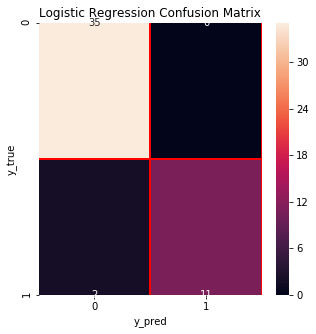

In [32]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
score.append(lr.score(x_test,y_test)*100)
algorithms.append("Logistic Regression")
print("test accuracy {}".format(lr.score(x_test,y_test)))
#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred=lr.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)
print(cm)
#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

In [33]:
trace1 = {
  'x': algorithms,
  'y': score,
  'name': 'score',
  'type': 'bar'
}

In [34]:
data = [trace1];
layout = {
  'xaxis': {'title': 'Classification Algorithms'},
  'title': 'Comparison of the accuracy of classification algorithms'
};
fig = go.Figure(data = data, layout = layout)
iplot(fig)


**CONCLUSION**

In this study, there were 400 samples and 26 parameters.However, some samples had no parameter values. For this reason, I prepared the data to use the classification algorithms. I did data visualization work.  I applied classification algorithms and compared success rates with each other.   It was a nice work for me. I hope you like it.
If you have questions and suggestions, you can comment. Because your questions and suggestions are very valuable for me.
     

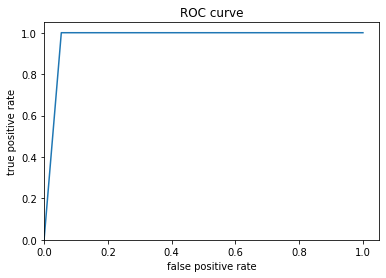

In [35]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_pred, y_true)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.xlim(0,)
plt.ylim(0,)
plt.show()